In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MultiLabelBinarizer

from mlxtend.frequent_patterns import apriori

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, dendrogram

In [4]:
data = pd.read_excel('Test_Malware.xlsx', sheet_name='Лист1')
print(data.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(89913, 4)


In [5]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id        v2.1date v2Companyname v2Malware
0  20220305000000-402  20220305000000    «А Групп»    AS_0036
1  20220305000000-402  20220305000000    «А Групп»    AS_0041
2  20220305000000-402  20220305000000    «А Групп»    AS_0168
3  20220305000000-402  20220305000000    «А Групп»    AS_0192
4  20220305000000-402  20220305000000    «А Групп»    AS_0243

In [6]:
data.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['id', 'v2.1date', 'v2Companyname', 'v2Malware'], dtype='object')

### Проверка данных

In [7]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id               0
v2.1date         0
v2Companyname    0
v2Malware        0
dtype: int64

In [8]:
data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id               object
v2.1date          int64
v2Companyname    object
v2Malware        object
dtype: object

In [9]:
data['v2.1date'] = pd.to_datetime(data['v2.1date'], format='%Y%m%d%H%M%S')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
data.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id                   v2.1date    v2Companyname          v2Malware
20220305000000-1264  2022-03-05  «ТГК-16»               WD_164       178
                                                        SH_564       178
                                                        SH_563       150
                                                        WD_180        91
                                                        SH_585        91
                                                                    ... 
20220305000000-666   2022-03-05  Группа «Волга-Днепр»   AS_0034        1
                                                        AS_0036        1
                                                        AS_0047        1
                                                        AS_0135        1
20220305000000-896   2022-03-05  Winonapost             RLP_3195       1
Name: count, Length: 45781, dtype: int64

In [11]:
data = data.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
data['time'] = data['v2.1date'].dt.time
del data['v2.1date']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-37d4cd7f710c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = data['v2.1date'].dt.time


In [13]:
time_range = data['time'].min(), data['time'].max()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Cтатистические характеристики выборки

In [14]:
statistics = {
    'Total Records': data.shape[0],
    'Unique Companies': data['v2Companyname'].nunique(),
    'Unique Malware': data['v2Malware'].nunique(),
    'Time Range': time_range
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
statistics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Total Records': 45781,
 'Unique Companies': 420,
 'Unique Malware': 2461,
 'Time Range': (datetime.time(0, 0), datetime.time(1, 15))}

In [16]:
grouped = data.groupby(['v2Companyname', 'time', 'v2Malware']).size().reset_index(name='frequency')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


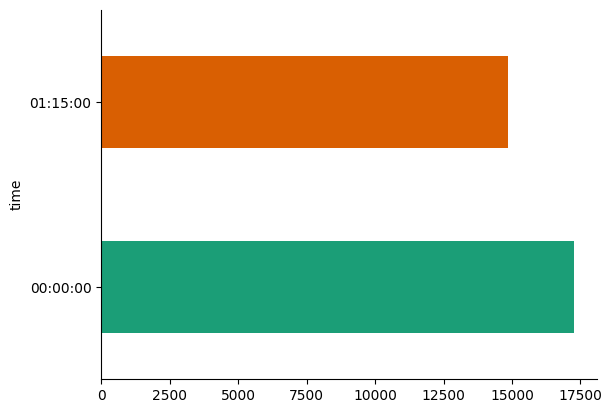

In [17]:
grouped.groupby('time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
freq_company = data.groupby(['v2Companyname']).size().reset_index(name='total_frequency')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
freq_company.sort_values(by='total_frequency', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


v2Companyname  total_frequency
211                         «Новотранс»             2637
284                           «ТГК-16»              2250
184                         «Метафракс»             1011
308         «Ферреро Руссия» (Ferrero)               879
363               Группа «Волга-Днепр»               791
381                Концерн «Калашников»              657
247                          «РусВинил»              638
154  «Кимберли-Кларк» (Kimberly-Clark)               607
215                            «Полюс»               606
333                   «Южуралзолото» ГК              563

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


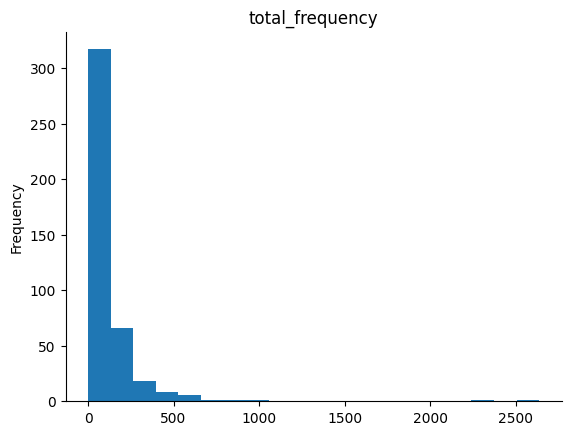

In [20]:
freq_company['total_frequency'].plot(kind='hist', bins=20, title='total_frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
freq_malware = data.groupby(['v2Malware']).size().reset_index(name='total_frequency')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
freq_malware.sort_values(by='total_frequency', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


v2Malware  total_frequency
35     AS_0036              695
1507    SH_682              560
1533    SH_708              515
776    PKT_558              501
752    PKT_534              483
244    AS_0245              463
134    AS_0135              462
211    AS_0212              449
33     AS_0034              422
257    AS_0258              421

In [23]:
time_counts = data['time'].value_counts()
print(time_counts)

time
00:00:00    25044
01:15:00    20737
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
time_mapping = {
    "00:00:00": 0,
    "01:15:00": 1
}
data['time'] = data['time'].astype(str)
data['time'] = data['time'].map(time_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
df = pd.DataFrame(data)

pivot = df.pivot_table(index=['v2Companyname', 'v2Malware'], columns='time', aggfunc='size', fill_value=0)
pivot['re-attack'] = (pivot[0] > 0) & (pivot[1] > 0)

data = df.merge(pivot['re-attack'].reset_index(), on=['v2Companyname', 'v2Malware'], how='left')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
data['Malware_type'] = data['v2Malware'].str.extract(r'^(.*?)_', expand=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id v2Companyname v2Malware  time  re-attack Malware_type
0  20220305000000-402    «А Групп»    AS_0036     0      False           AS
1  20220305000000-402    «А Групп»    AS_0041     0      False           AS
2  20220305000000-402    «А Групп»    AS_0168     0      False           AS
3  20220305000000-402    «А Групп»    AS_0192     0      False           AS
4  20220305000000-402    «А Групп»    AS_0243     0      False           AS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


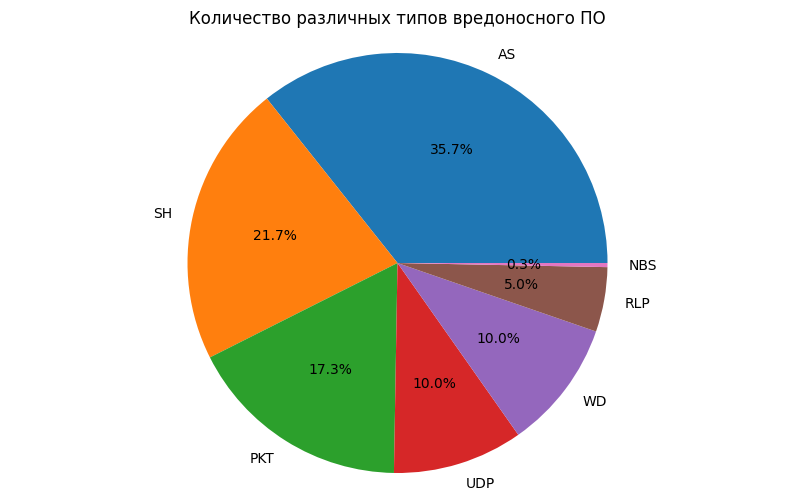

In [28]:
type_counts = data['Malware_type'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Количество различных типов вредоносного ПО')
plt.axis('equal')
plt.show()

In [29]:
df = data.groupby(['v2Companyname', 'v2Malware', 'Malware_type', 're-attack']).size().reset_index(name='frequency')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
print(data.shape)
print(df.shape)

(45781, 6)
(31175, 5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# df.to_excel('bd.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


v2Companyname v2Malware Malware_type  re-attack  frequency
0  ABH Holdings (Альфа-Банк)    AS_0008           AS      False          1
1  ABH Holdings (Альфа-Банк)    AS_0010           AS      False          1
2  ABH Holdings (Альфа-Банк)    AS_0036           AS      False          1
3  ABH Holdings (Альфа-Банк)    AS_0047           AS      False          1
4  ABH Holdings (Альфа-Банк)    AS_0135           AS      False          1

###  Алгоритм выявления хакерских группировок по почерку

In [ ]:
df_encoded = pd.get_dummies(df, columns=['v2Companyname', 'v2Malware', 'Malware_type'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
X = df_encoded.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



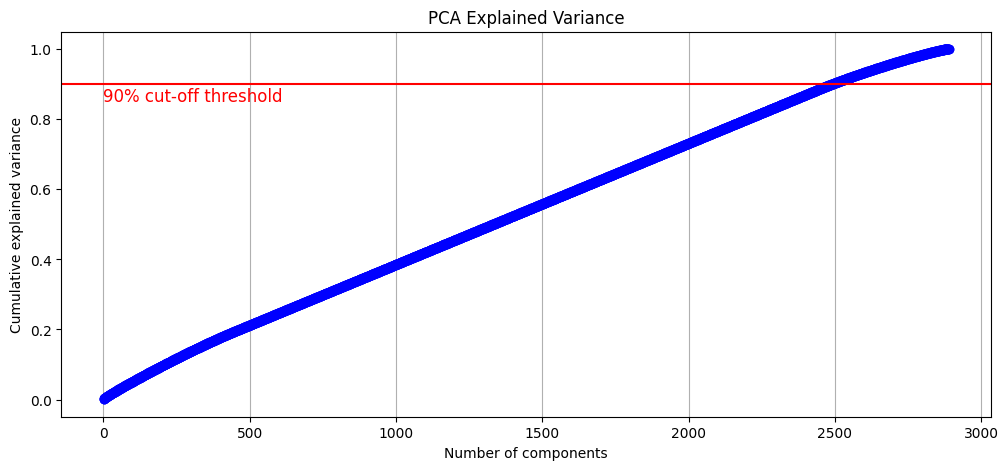

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

pca = PCA().fit(X_scaled)

plt.figure(figsize=(12, 5))
x = np.arange(1, len(pca.explained_variance_ratio_)+1, 1)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.6, 0.85, '90% cut-off threshold', color='red', fontsize=12)
plt.grid(axis='x')

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA Explained Variance')
plt.show()

In [ ]:
attack_matrix = data.groupby(['v2Companyname', 'Malware_type']).size().unstack(fill_value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


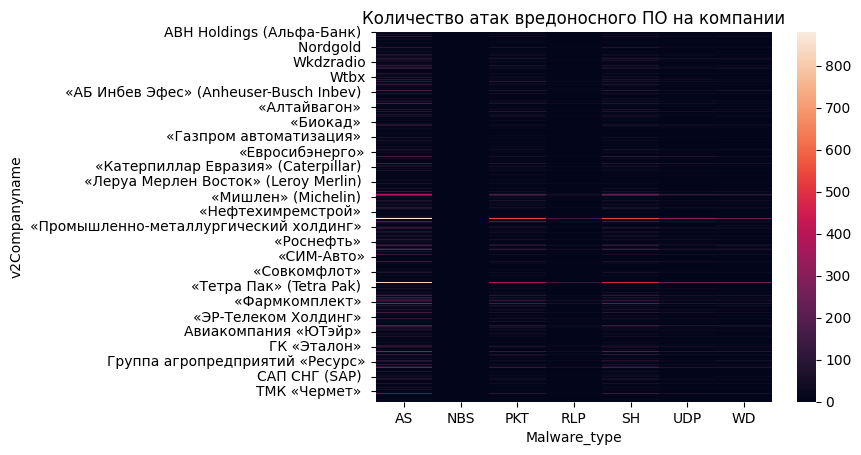

In [ ]:
sns.heatmap(attack_matrix, annot=False, fmt='g')
plt.title('Количество атак вредоносного ПО на компании')
plt.show()

In [32]:
attack_matrix = data.groupby(['v2Companyname', 'v2Malware', 'time']).size().unstack(fill_value=0).reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
combined = data.groupby('v2Companyname')['v2Malware'].apply(list).reset_index()
combined['time1'] = attack_matrix.groupby('v2Companyname')[0].apply(list).reset_index()[0]
combined['time2'] = attack_matrix.groupby('v2Companyname')[1].apply(list).reset_index()[1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
attack_matrix = data.groupby(['v2Companyname', 'v2Malware']).size().unstack(fill_value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [35]:
df_combined = combined.copy()

df_combined['transactions'] = df_combined.apply(lambda row: list(zip(row['v2Malware'], row['time1'], row['time2'])), axis=1)

transactions = []
for _, row in df_combined.iterrows():
    transaction = []
    for malware, t1, t2 in row['transactions']:
        if t1 > 0 or t2 > 0:
            transaction.append(malware)
    transactions.append(transaction)

transactions_df = pd.DataFrame(transactions)
transactions_df.fillna('', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.15, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
from mlxtend.frequent_patterns import association_rules

print("Частые наборы вредоносных программ:")
print(frequent_itemsets)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\nАссоциативные правила:")
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Частые наборы вредоносных программ:
        support                                           itemsets
0      0.342857                                          (AS_0005)
1      0.366667                                          (AS_0010)
2      0.216667                                          (AS_0011)
3      0.185714                                          (AS_0013)
4      0.328571                                          (AS_0030)
...         ...                                                ...
23639  0.150000  (AS_0258, PKT_610, AS_0034, AS_0036, PKT_335, ...
23640  0.150000  (AS_0258, PKT_610, AS_0034, AS_0036, PKT_335, ...
23641  0.152381  (RLP_3229, AS_0036, RLP_3231, AS_0223, AS_0212...
23642  0.152381  (RLP_3229, RLP_3231, AS_0223, AS_0212, PKT_537...
23643  0.171429  (RLP_3229, RLP_3231, AS_0223, AS_0212, PKT_537...

[23644 rows x 2 columns]

Ассоциативные правила:
       antecedents                                        consequents  \
0        (AS_0010)                   

In [42]:
frequent_itemsets[frequent_itemsets['support'] > 0.4]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support            itemsets
6    0.454762           (AS_0034)
7    0.590476           (AS_0036)
13   0.485714           (AS_0135)
19   0.459524           (AS_0172)
25   0.497619           (AS_0212)
27   0.402381           (AS_0243)
28   0.490476           (AS_0245)
30   0.464286           (AS_0258)
33   0.423810           (AS_0274)
43   0.411905           (PKT_335)
51   0.497619           (PKT_534)
58   0.516667           (PKT_558)
77   0.459524            (SH_682)
222  0.411905  (AS_0034, AS_0036)
313  0.407143  (PKT_558, AS_0036)
647  0.404762  (AS_0212, AS_0274)
658  0.423810  (AS_0212, PKT_534)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



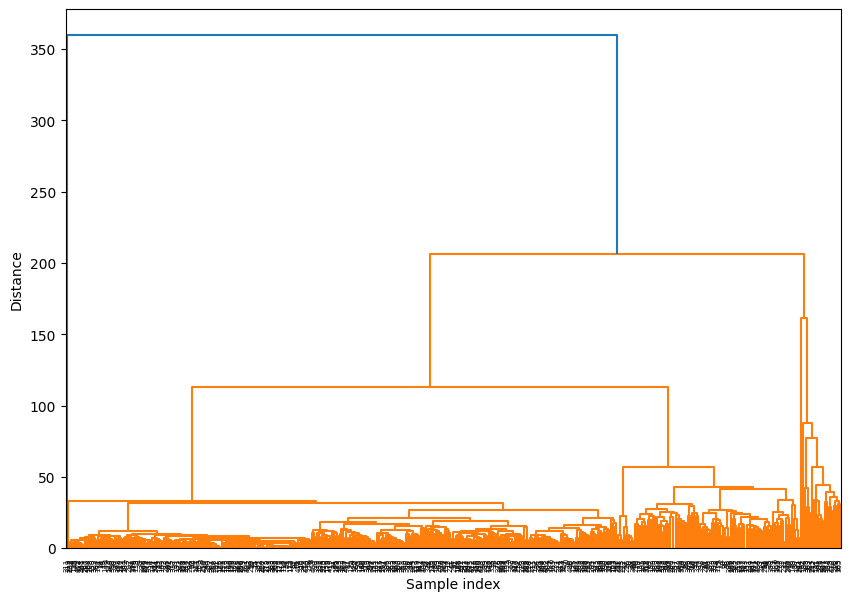

In [88]:
Z = linkage(attack_matrix, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



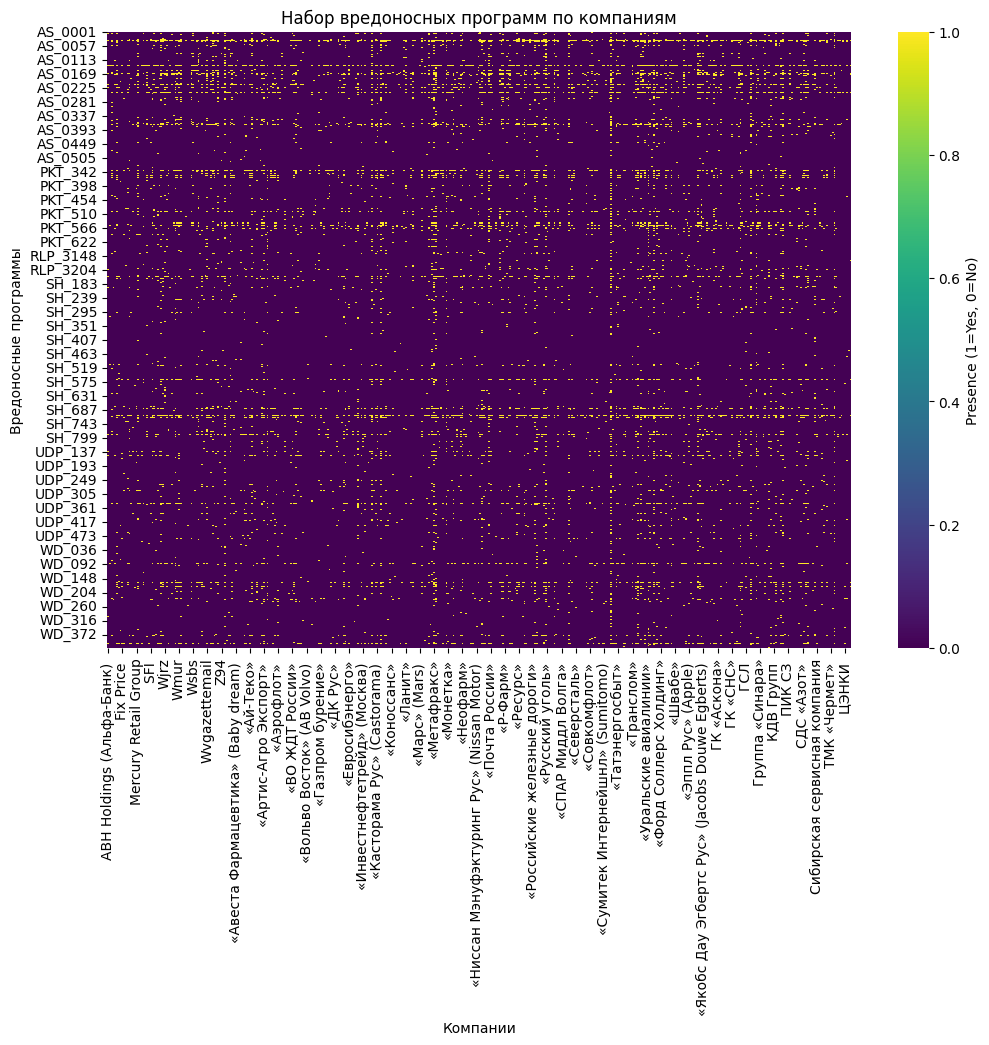

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(attack_matrix.T, cmap='viridis', cbar_kws={'label': 'Presence (1=Yes, 0=No)'})
plt.title('Набор вредоносных программ по компаниям')
plt.xlabel('Компании')
plt.ylabel('Вредоносные программы')
plt.show()

In [43]:
mlb = MultiLabelBinarizer()
df_encoded = df.groupby(['v2Companyname'])['v2Malware'].apply(list).reset_index()
df_encoded = df_encoded.join(pd.DataFrame(mlb.fit_transform(df_encoded.pop('v2Malware')),
                                          columns=mlb.classes_,
                                          index=df_encoded.index))

new_columns = {}
for index, row in frequent_itemsets.iterrows():
    itemset = row['itemsets']
    itemset_name = '-'.join(itemset)
    new_columns[itemset_name] = (df_encoded[list(itemset)].sum(axis=1) >= len(itemset))

df_encoded = pd.concat([df_encoded, pd.DataFrame(new_columns)], axis=1)

df_encoded = df_encoded.drop(columns=mlb.classes_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#df_encoded_copy = pd.merge(df_encoded, data.groupby(['v2Companyname', 'v2Malware']).size().unstack(fill_value=0), on='v2Companyname', how='outer')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [44]:
df_encoded_copy = df_encoded.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X = df_encoded.drop('v2Companyname', axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



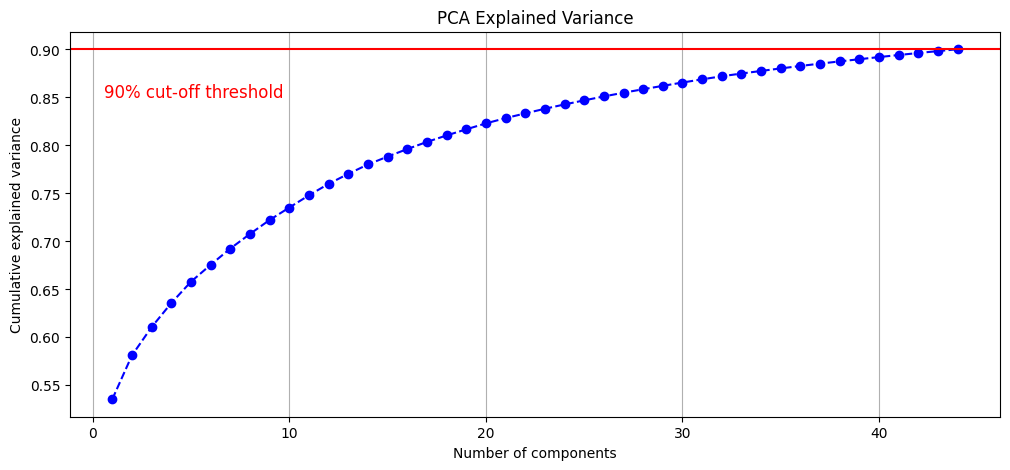

In [ ]:
pca = PCA(n_components=0.9).fit(X)

plt.figure(figsize=(12, 5))
x = np.arange(1, len(pca.explained_variance_ratio_)+1, 1)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.6, 0.85, '90% cut-off threshold', color='red', fontsize=12)
plt.grid(axis='x')

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA Explained Variance')
plt.show()

In [ ]:
pca = PCA(n_components=0.9)
features_pca = pca.fit_transform(df_encoded_copy.drop('v2Companyname', axis=1))

dbscan = DBSCAN(eps=0.1, min_samples=2)
clusters = dbscan.fit_predict(features_pca)

df_encoded_copy['Cluster'] = clusters

grouping_table = df_encoded_copy[['Cluster', 'v2Companyname']].copy()
grouping_table['Malware'] = df_encoded_copy.drop(columns=['Cluster', 'v2Companyname']).apply(
    lambda x: x[x > 0].index.tolist(), axis=1
)

grouping_table = grouping_table.groupby('Cluster').agg({
    'v2Companyname': lambda x: ', '.join(x),
    'Malware': lambda x: list(set([item for sublist in x for item in sublist]))
}).reset_index()

grouping_table.columns = ['Условное наименование хакерской группировки', 'Перечень атакованных компаний', 'Перечень применяемых вредоносных программ']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
grouping_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Условное наименование хакерской группировки  \
0                                           -1   
1                                            0   
2                                            1   
3                                            2   
4                                            3   
5                                            4   
6                                            5   
7                                            6   
8                                            7   

                       Перечень атакованных компаний  \
0  ABH Holdings (Альфа-Банк) , Abbott (Россия), A...   
1  BAT, Hoff (Домашний интерьер) , Media Directio...   
2                       «Авито» (Avito) , «СИМ-Авто»   
3  «Зарубежнефть», Совкомбанк , Холдинг «Транспор...   
4  «Инвестнефтетрейд» (Краснодар), «Каспийский тр...   
5                            «Метафракс», Тарко-Сале   
6          «Монди СЛПК» (Mondi) , «Российские сети»    
7                            «Неофарм», «Татэнерго»    
8  «Ферреро Руссия» (Ferrero) , Группа «Волга-Дне...   

           Перечень применяемых вредоносных программ  
0  [PKT_558-AS_0258-AS_0211-AS_0034-AS_0248, AS_0...  
1  [PKT_534-AS_0135, AS_0036-AS_0245, AS_0135-AS_...  
2  [PKT_555-PKT_548-PKT_556, AS_0273-PKT_556-PKT_...  
3  [AS_0245-SH_563, SH_708-AS_0245, SH_708-SH_563...  
4  [PKT_558-AS_0036-PKT_335-AS_0272-AS_0248, AS_0...  
5  [PKT_558-AS_0258-AS_0211-AS_0034-AS_0248, AS_0...  
6  [PKT_558-AS_0036-PKT_335-AS_0272-AS_0248, AS_0...  
7  [PKT_558-AS_0036-PKT_335-AS_0272-AS_0248, AS_0...  
8  [PKT_558-AS_0258-AS_0211-AS_0034-AS_0248, AS_0...

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



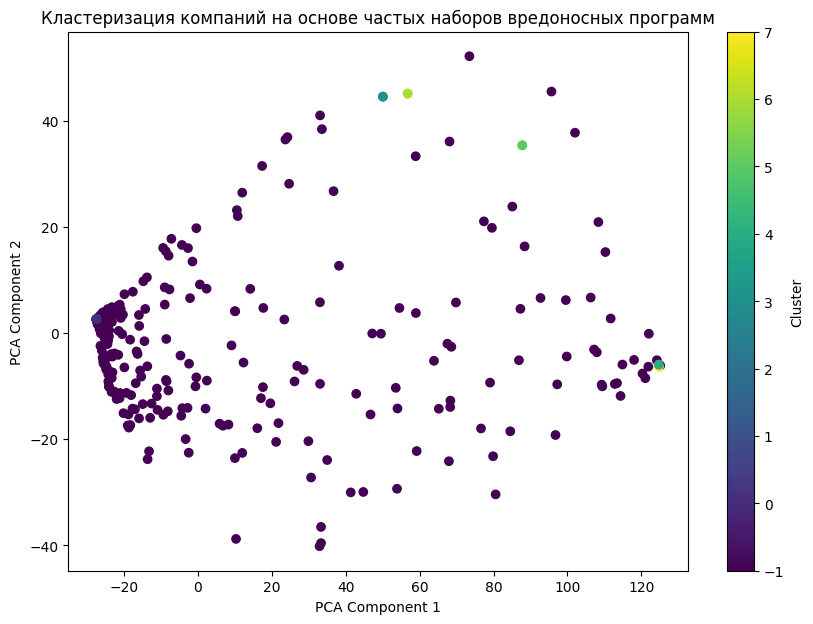

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Кластеризация компаний на основе частых наборов вредоносных программ')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
fig = px.scatter_3d(
    x=features_pca[:, 0], y=features_pca[:, 1], z=df_encoded_copy['Cluster'],
    color=df_encoded_copy['Cluster'],
    labels={'color': 'Cluster'}
)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
def dbscan_grid_search(data, eps_values, min_samples_values):
    best_score = -1
    best_params = {}
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            if len(set(labels)) > 1:
                score = silhouette_score(data, labels)
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
    return best_params, best_score

eps_values = np.arange(0.1, 0.5, 1.5)
min_samples_values = range(2, 10)

best_params, best_score = dbscan_grid_search(features_pca, eps_values, min_samples_values)

print(f"Лучшие параметры: {best_params}")
print(f"Лучший silhouette score: {best_score}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Лучшие параметры: {'eps': 0.1, 'min_samples': 4}
Лучший silhouette score: -0.29109631951275466


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



100


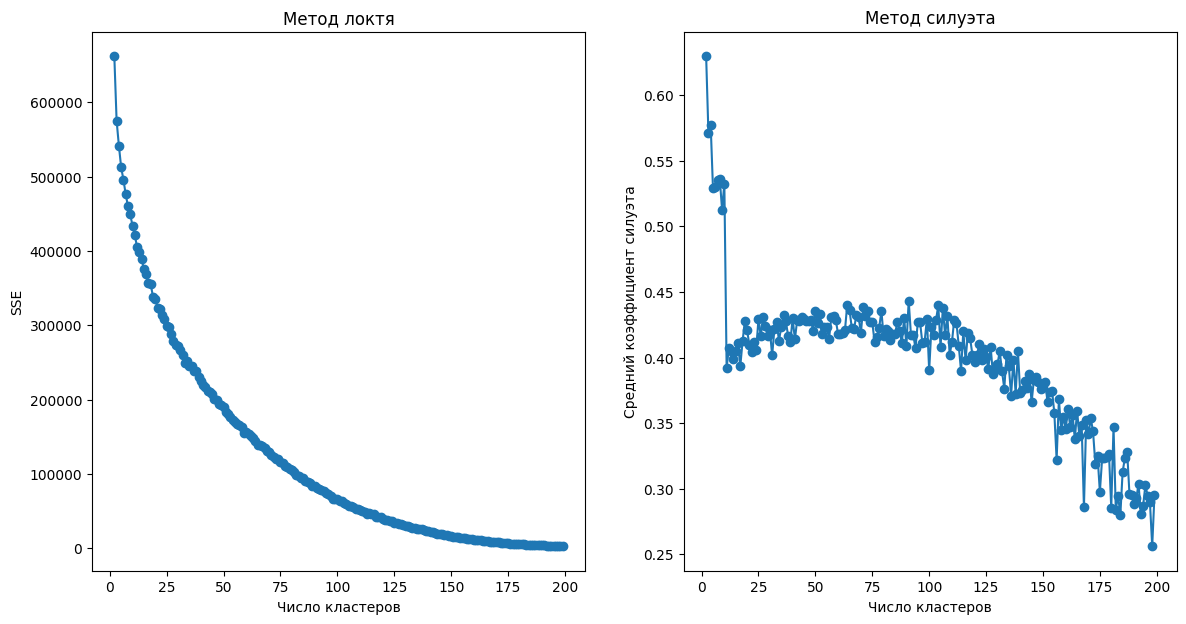

In [ ]:
sse = []
silhouette_scores = []
range_n_clusters = range(2, 200)

pca = PCA(n_components=0.9)
features_pca = pca.fit_transform(df_encoded.drop('v2Companyname', axis=1))

for n_clusters in range_n_clusters:
    if n_clusters % 100 == 0: print(n_clusters)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(features_pca)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_pca, clusters))


plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, sse, marker='o')
plt.title('Метод локтя')
plt.xlabel('Число кластеров')
plt.ylabel('SSE')


plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Метод силуэта')
plt.xlabel('Число кластеров')
plt.ylabel('Средний коэффициент силуэта')
plt.show()

In [ ]:
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Оптимальное число кластеров: {optimal_clusters}")

Оптимальное число кластеров: 2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [45]:
pca = PCA(n_components=0.9)
features_pca = pca.fit_transform(df_encoded_copy.drop('v2Companyname', axis=1))

agglomerative = AgglomerativeClustering(distance_threshold=0.5, n_clusters=None)
clusters = agglomerative.fit_predict(features_pca)

df_encoded_copy['Cluster'] = clusters

clusters_analysis = df_encoded_copy.groupby('Cluster').agg({
    'v2Companyname': list,
    **{col: 'sum' for col in df_encoded_copy.columns if col != 'v2Companyname' and col != 'Cluster'}
}).reset_index()

grouping_table = clusters_analysis[['Cluster', 'v2Companyname']].copy()
grouping_table['Malware'] = clusters_analysis.drop(columns=['Cluster', 'v2Companyname']).apply(lambda x: x[x > 0].index.tolist(), axis=1)
grouping_table.columns = ['Условное наименование хакерской группировки', 'Перечень атакованных компаний', 'Перечень применяемых вредоносных программ']

print("\nТаблица гипотез:")
print(grouping_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Таблица гипотез:
     Условное наименование хакерской группировки  \
0                                              0   
1                                              1   
2                                              2   
3                                              3   
4                                              4   
..                                           ...   
328                                          328   
329                                          329   
330                                          330   
331                                          331   
332                                          332   

                         Перечень атакованных компаний  \
0    [BAT, Hoff (Домашний интерьер) , Media Directi...   
1    [«Алтайвагон» , «Вирлпул Рус» (Whirlpool) , «Н...   
2                            [«Неофарм», «Татэнерго» ]   
3                      [«Деловые линии» , «Ямал СПГ» ]   
4                              [Wisbusiness, «Ростех»]   
..       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


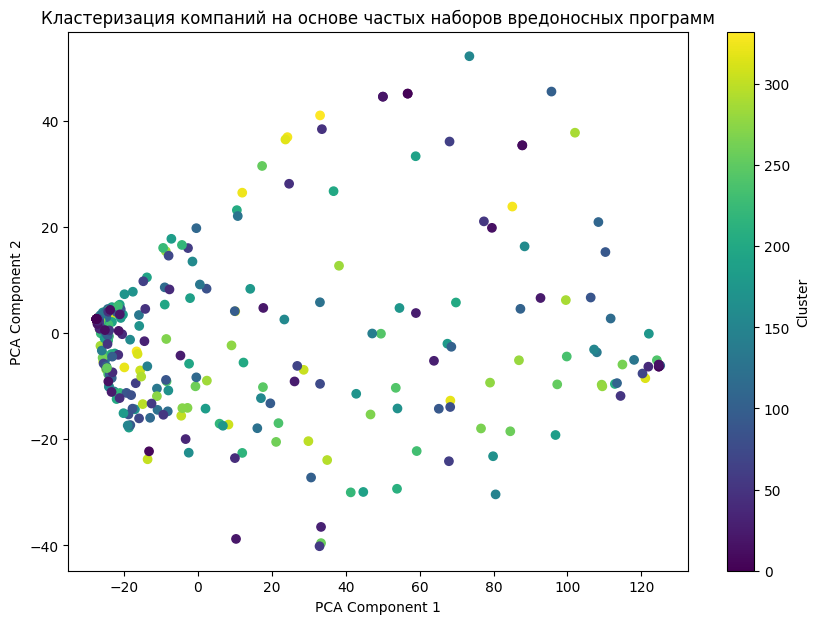

In [46]:
plt.figure(figsize=(10, 7))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Кластеризация компаний на основе частых наборов вредоносных программ')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [47]:
fig = px.scatter_3d(
    x=features_pca[:, 0], y=features_pca[:, 1], z=df_encoded_copy['Cluster'],
    color=df_encoded_copy['Cluster'],
    labels={'color': 'Cluster'}
)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
fig = px.scatter_3d(
    features_pca, x=0,y=1,z=2,
    labels={'Cluster': 'Cluster'},
)
fig.update_traces(marker_size=2)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [49]:
def extract_unique_malwares(combination_series):
    unique_malwares = set()
    for combination in combination_series:
        if pd.notna(combination):
            malwares = combination.split('-')
            unique_malwares.update(malwares)

    return unique_malwares

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [50]:
grouping_table['Перечень применяемых вредоносных программ'] = grouping_table['Перечень применяемых вредоносных программ'].apply(extract_unique_malwares)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [51]:
grouping_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Условное наименование хакерской группировки  \
0                                              0   
1                                              1   
2                                              2   
3                                              3   
4                                              4   
..                                           ...   
328                                          328   
329                                          329   
330                                          330   
331                                          331   
332                                          332   

                         Перечень атакованных компаний  \
0    [BAT, Hoff (Домашний интерьер) , Media Directi...   
1    [«Алтайвагон» , «Вирлпул Рус» (Whirlpool) , «Н...   
2                            [«Неофарм», «Татэнерго» ]   
3                      [«Деловые линии» , «Ямал СПГ» ]   
4                              [Wisbusiness, «Ростех»]   
..                                                 ...   
328                                [«Евроцемент Груп»]   
329                     [«Гленкор Агро Мзк» (Firada) ]   
330                              [«Мессояханефтегаз» ]   
331                                             [Wncw]   
332                                         [«Крокус»]   

             Перечень применяемых вредоносных программ  
0    {AS_0274, AS_0172, AS_0135, SH_183, SH_708, AS...  
1    {PKT_610, AS_0036, PKT_336, AS_0185, PKT_335, ...  
2    {PKT_556, PKT_335, SH_675, SH_770, AS_0172, AS...  
3    {AS_0212, AS_0274, PKT_534, AS_0030, AS_0245, ...  
4    {AS_0185, PKT_500, AS_0047, SH_675, SH_770, AS...  
..                                                 ...  
328  {PKT_568, PKT_569, AS_0172, SH_682, AS_0273, P...  
329  {PKT_335, AS_0274, NBS_17, AS_0135, SH_183, PK...  
330  {PKT_555, AS_0039, AS_0212, AS_0274, AS_0030, ...  
331  {PKT_544, PKT_548, PKT_556, PKT_335, PKT_356, ...  
332  {PKT_555, PKT_556, AS_0171, SH_770, AS_0172, A...  

[333 rows x 3 columns]

In [52]:
grouping_table.to_excel('clusters.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




### коэффициент Жаккара

In [53]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [54]:
from itertools import combinations

similarity_results = []
for (index1, row1), (index2, row2) in combinations(combined.iterrows(), 2):
    set1 = set(row1['v2Malware'])
    set2 = set(row2['v2Malware'])
    similarity = jaccard_similarity(set1, set2)

    similarity_results.append({
        'Company 1': row1['v2Companyname'],
        'Company 2': row2['v2Companyname'],
        'Jaccard Similarity': similarity
    })

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [55]:
similarity_df = pd.DataFrame(similarity_results)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [56]:
similarity_df[similarity_df['Jaccard Similarity'] > 0.7]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Company 1  \
8743                             RRC    
12295                          Wishtv   
12345                          Wishtv   
12724                             Wjr   
15630                            Wmuk   
15786                            Wmuk   
15945                            Wmuk   
16540                            Wncw   
16569                            Wncw   
18949                            Wrvo   
22888                            Wvtf   
27067                   «АСЦ-Холдинг»   
27070                   «АСЦ-Холдинг»   
27229                   «АСЦ-Холдинг»   
49771  «Инвестнефтетрейд» (Краснодар)   
61933           «Монди СЛПК» (Mondi)    
63986                       «Неофарм»   
68490                       «Протек»    
68712   «Пфайзер Инновации» (Pfizer)    
69427                       «РМ Рейл»   

                                       Company 2  Jaccard Similarity  
8743                              «Марс» (Mars)             1.000000  
12295                      «Монди СЛПК» (Mondi)             0.756184  
12345                         «Российские сети»             0.707237  
12724                                  «Ресурс»             0.909091  
15630                              «АСЦ-Холдинг»            0.871287  
15786                                  «РМ Рейл»            0.761062  
15945            ПК «Балтика» (Carlsbergfondet)             0.868687  
16540              «Пфайзер Инновации» (Pfizer)             0.931034  
16569                               «РэйлАльянс»            0.744565  
18949            ПК «Балтика» (Carlsbergfondet)             0.734375  
22888                              «Транснефть»             0.728070  
27067              «Пфайзер Инновации» (Pfizer)             0.748148  
27070                                  «РМ Рейл»            0.709677  
27229            ПК «Балтика» (Carlsbergfondet)             0.800000  
49771  «Каспийский трубопроводный консорциум-Р»             1.000000  
61933                         «Российские сети»             0.917293  
63986                               «Татэнерго»             1.000000  
68490                                  «РМ Рейл»            0.702532  
68712                               «РэйлАльянс»            0.767045  
69427            ПК «Балтика» (Carlsbergfondet)             0.719008

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



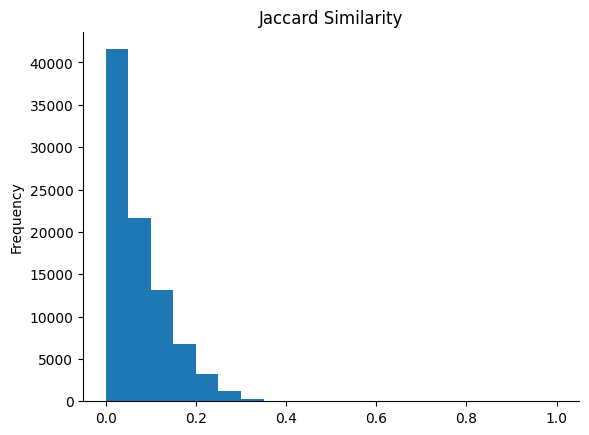

In [57]:
similarity_df['Jaccard Similarity'].plot(kind='hist', bins=20, title='Jaccard Similarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Косинусово сходство

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_matrix = cosine_similarity(attack_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [59]:
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df_encoded['v2Companyname'], columns=df_encoded['v2Companyname'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [60]:
cosine_sim_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



v2Companyname                                   ABH Holdings (Альфа-Банк)   \
v2Companyname                                                                
ABH Holdings (Альфа-Банк)                                         1.000000   
Abbott (Россия)                                                   0.117954   
Abi                                                               0.222234   
BAT                                                               0.081650   
Eastsib Holding                                                   0.162747   
...                                                                    ...   
Хоум Кредит энд Финанс Банк (PPF)                                 0.150000   
ЦЭНКИ                                                             0.040825   
Центральная пригородная пассажирская компания                     0.219089   
ЭНГС (Eriell)                                                     0.000000   
Энергосбытовая компания «Восток»                                  0.162747   

v2Companyname                                   Abbott (Россия)       Abi  \
v2Companyname                                                               
ABH Holdings (Альфа-Банк)                              0.117954  0.222234   
Abbott (Россия)                                        1.000000  0.074469   
Abi                                                    0.074469  1.000000   
BAT                                                    0.180579  0.123718   
Eastsib Holding                                        0.102839  0.105685   
...                                                         ...       ...   
Хоум Кредит энд Финанс Банк (PPF)                      0.000000  0.454569   
ЦЭНКИ                                                  0.000000  0.061859   
Центральная пригородная пассажирская компания          0.188434  0.368856   
ЭНГС (Eriell)                                          0.000000  0.053995   
Энергосбытовая компания «Восток»                       0.034280  0.211370   

v2Companyname                                        BAT  Eastsib Holding   \
v2Companyname                                                                
ABH Holdings (Альфа-Банк)                       0.081650          0.162747   
Abbott (Россия)                                 0.180579          0.102839   
Abi                                             0.123718          0.105685   
BAT                                             1.000000          0.000000   
Eastsib Holding                                 0.000000          1.000000   
...                                                  ...               ...   
Хоум Кредит энд Финанс Банк (PPF)               0.000000          0.000000   
ЦЭНКИ                                           0.000000          0.094916   
Центральная пригородная пассажирская компания   0.074536          0.212238   
ЭНГС (Eriell)                                   0.000000          0.124274   
Энергосбытовая компания «Восток»                0.047458          0.135135   

v2Companyname                                      En +   \
v2Companyname                                              
ABH Holdings (Альфа-Банк)                       0.300692   
Abbott (Россия)                                 0.041241   
Abi                                             0.310809   
BAT                                             0.057096   
Eastsib Holding                                 0.170709   
...                                                  ...   
Хоум Кредит энд Финанс Банк (PPF)               0.157339   
ЦЭНКИ                                           0.142741   
Центральная пригородная пассажирская компания   0.236192   
ЭНГС (Eriell)                                   0.018689   
Энергосбытовая компания «Восток»                0.406450   

v2Companyname                                   Eurasia Drilling Company   \
v2Companyname                                                               
ABH Holdings (Альфа-Банк)        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



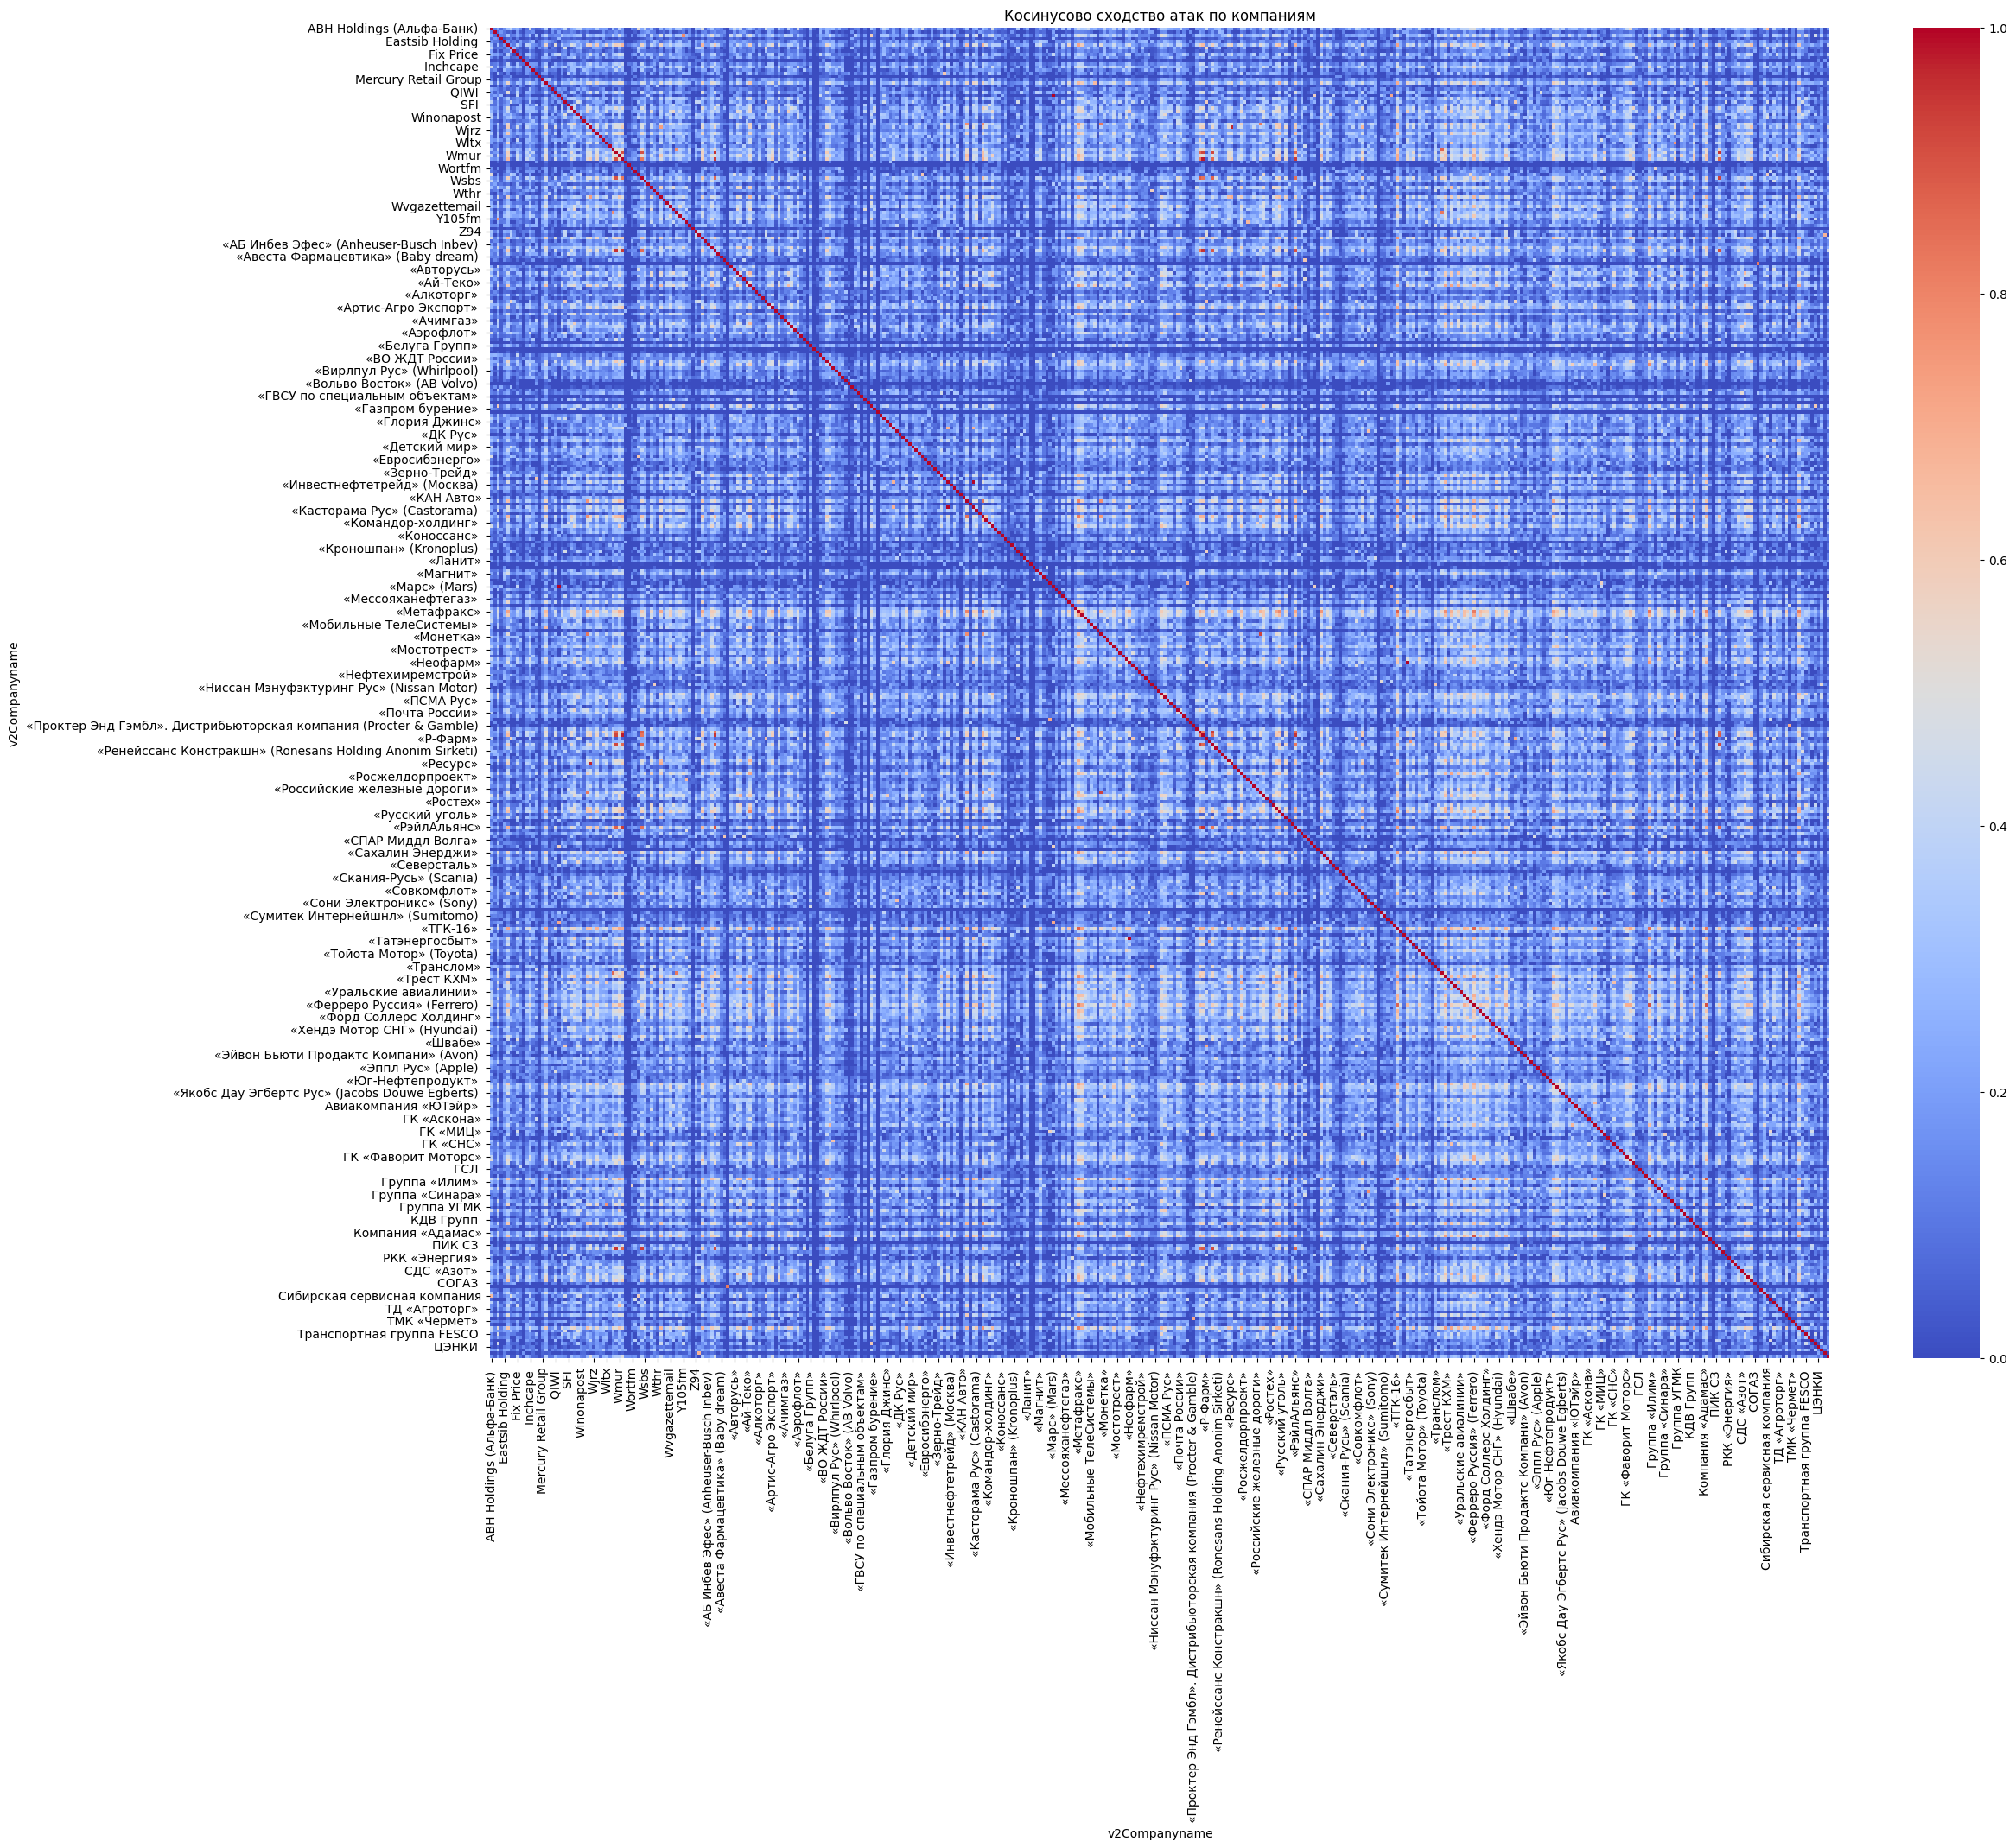

In [61]:
plt.figure(figsize=(25, 20))
sns.heatmap(cosine_sim_df, annot=False, cmap='coolwarm', cbar=True)
plt.title('Косинусово сходство атак по компаниям')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



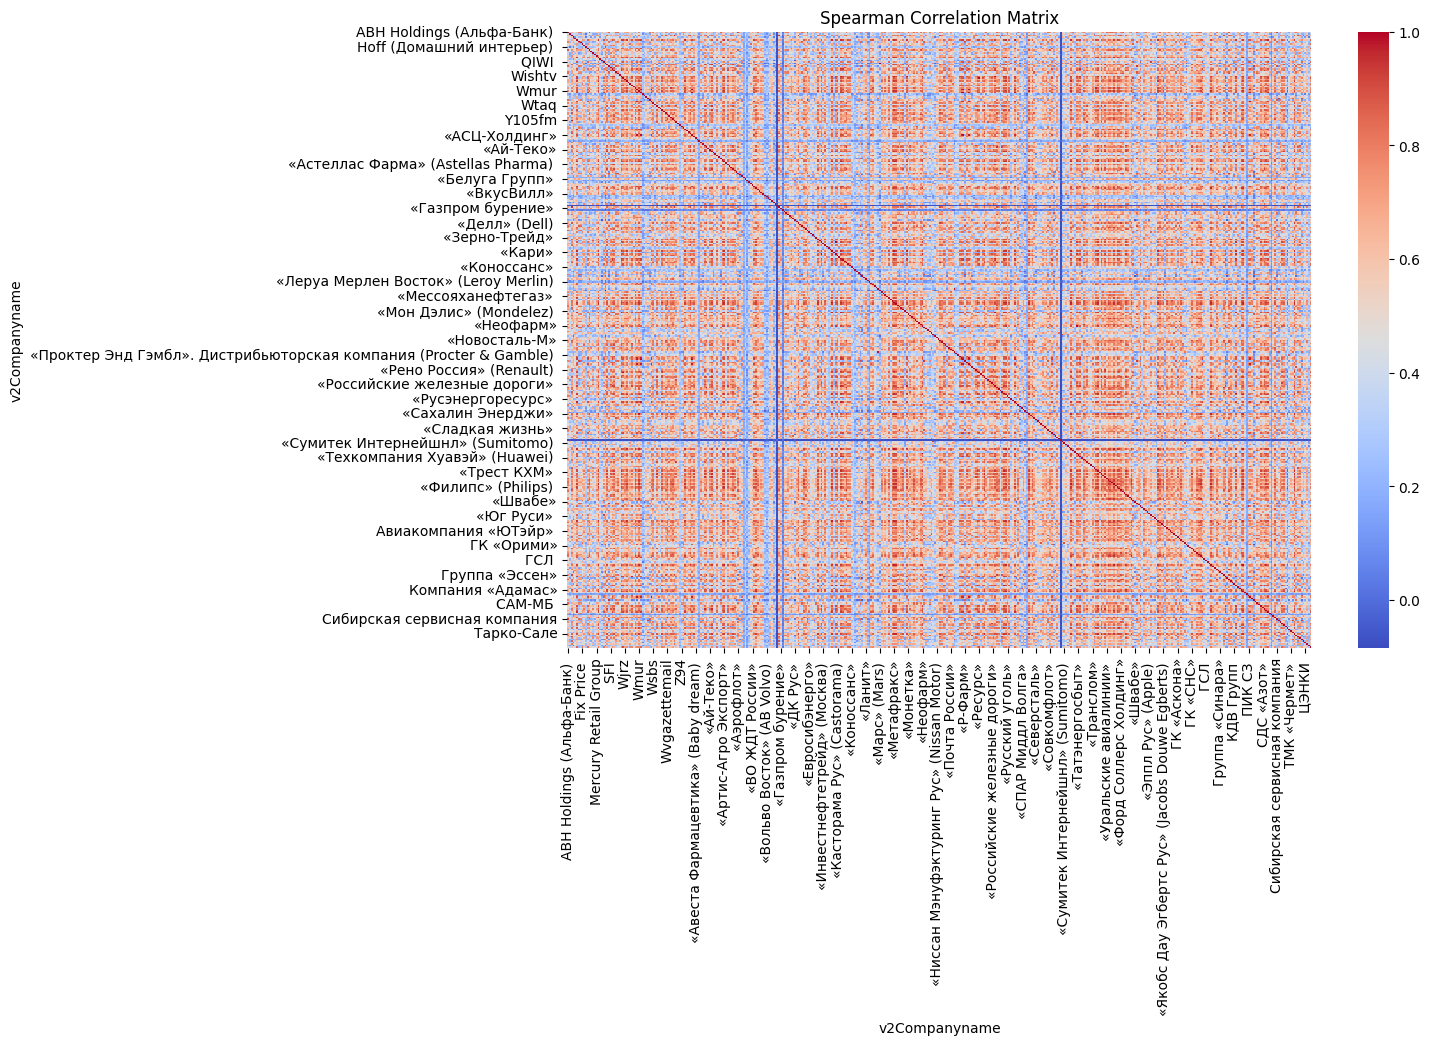

In [64]:
from scipy.stats import spearmanr

spearman_corr = cosine_sim_df.corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=False, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

In [66]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

distance_matrix = 1 - spearman_corr


linked = linkage(distance_matrix, method='average')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-66-bb651a89fe9e>:7: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



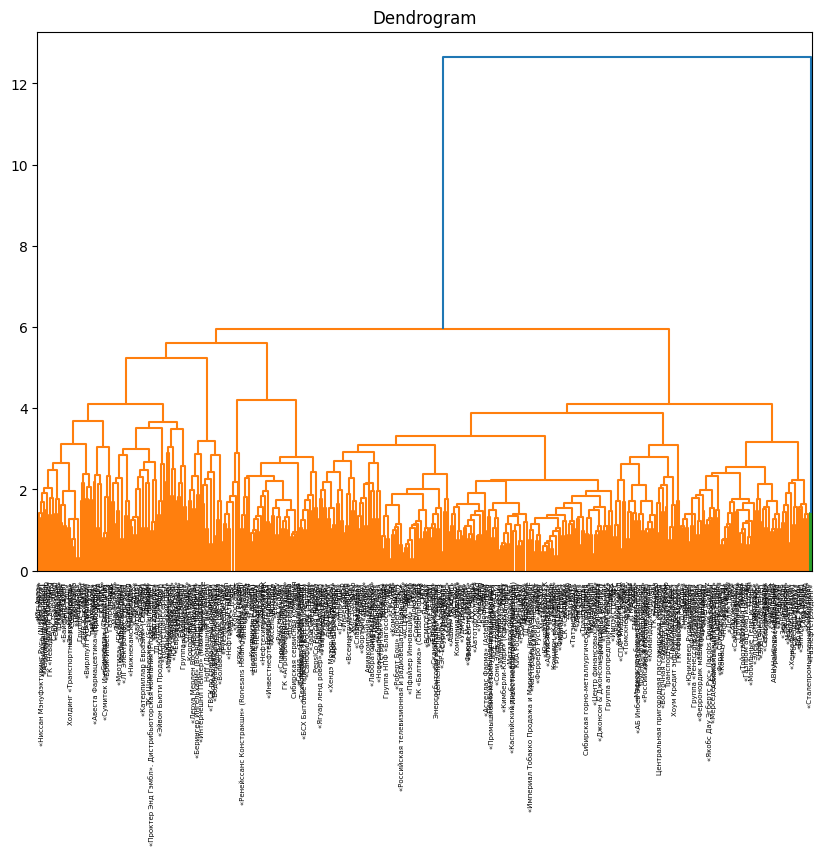

In [91]:
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=cosine_sim_df.index, orientation='top', distance_sort='descending')
plt.title('Dendrogram')
plt.show()

In [109]:
agglomerative = AgglomerativeClustering(distance_threshold=0.5, n_clusters=None, affinity='precomputed', linkage='average')
clusters = agglomerative.fit_predict(distance_matrix)

df_copy = data.groupby(['v2Companyname', 'v2Malware']).size().unstack(fill_value=0).reset_index()

df_copy['Cluster'] = clusters

clusters_analysis = df_copy.groupby('Cluster').agg({
    'v2Companyname': list,
    **{col: 'sum' for col in df_copy.columns if col != 'v2Companyname' and col != 'Cluster'}
}).reset_index()

grouping_table = clusters_analysis[['Cluster', 'v2Companyname']].copy()
grouping_table['Malware'] = clusters_analysis.drop(columns=['Cluster', 'v2Companyname']).apply(lambda x: x[x > 0].index.tolist(), axis=1)
grouping_table.columns = ['Условное наименование хакерской группировки', 'Перечень атакованных компаний', 'Перечень применяемых вредоносных программ']

print("\nТаблица гипотез:")
print(grouping_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead




Таблица гипотез:
    Условное наименование хакерской группировки  \
0                                             0   
1                                             1   
2                                             2   
3                                             3   
4                                             4   
5                                             5   
6                                             6   
7                                             7   
8                                             8   
9                                             9   
10                                           10   
11                                           11   
12                                           12   
13                                           13   
14                                           14   
15                                           15   
16                                           16   
17                                           17   
18           

In [110]:
grouping_table.to_excel('clusters_spearman.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



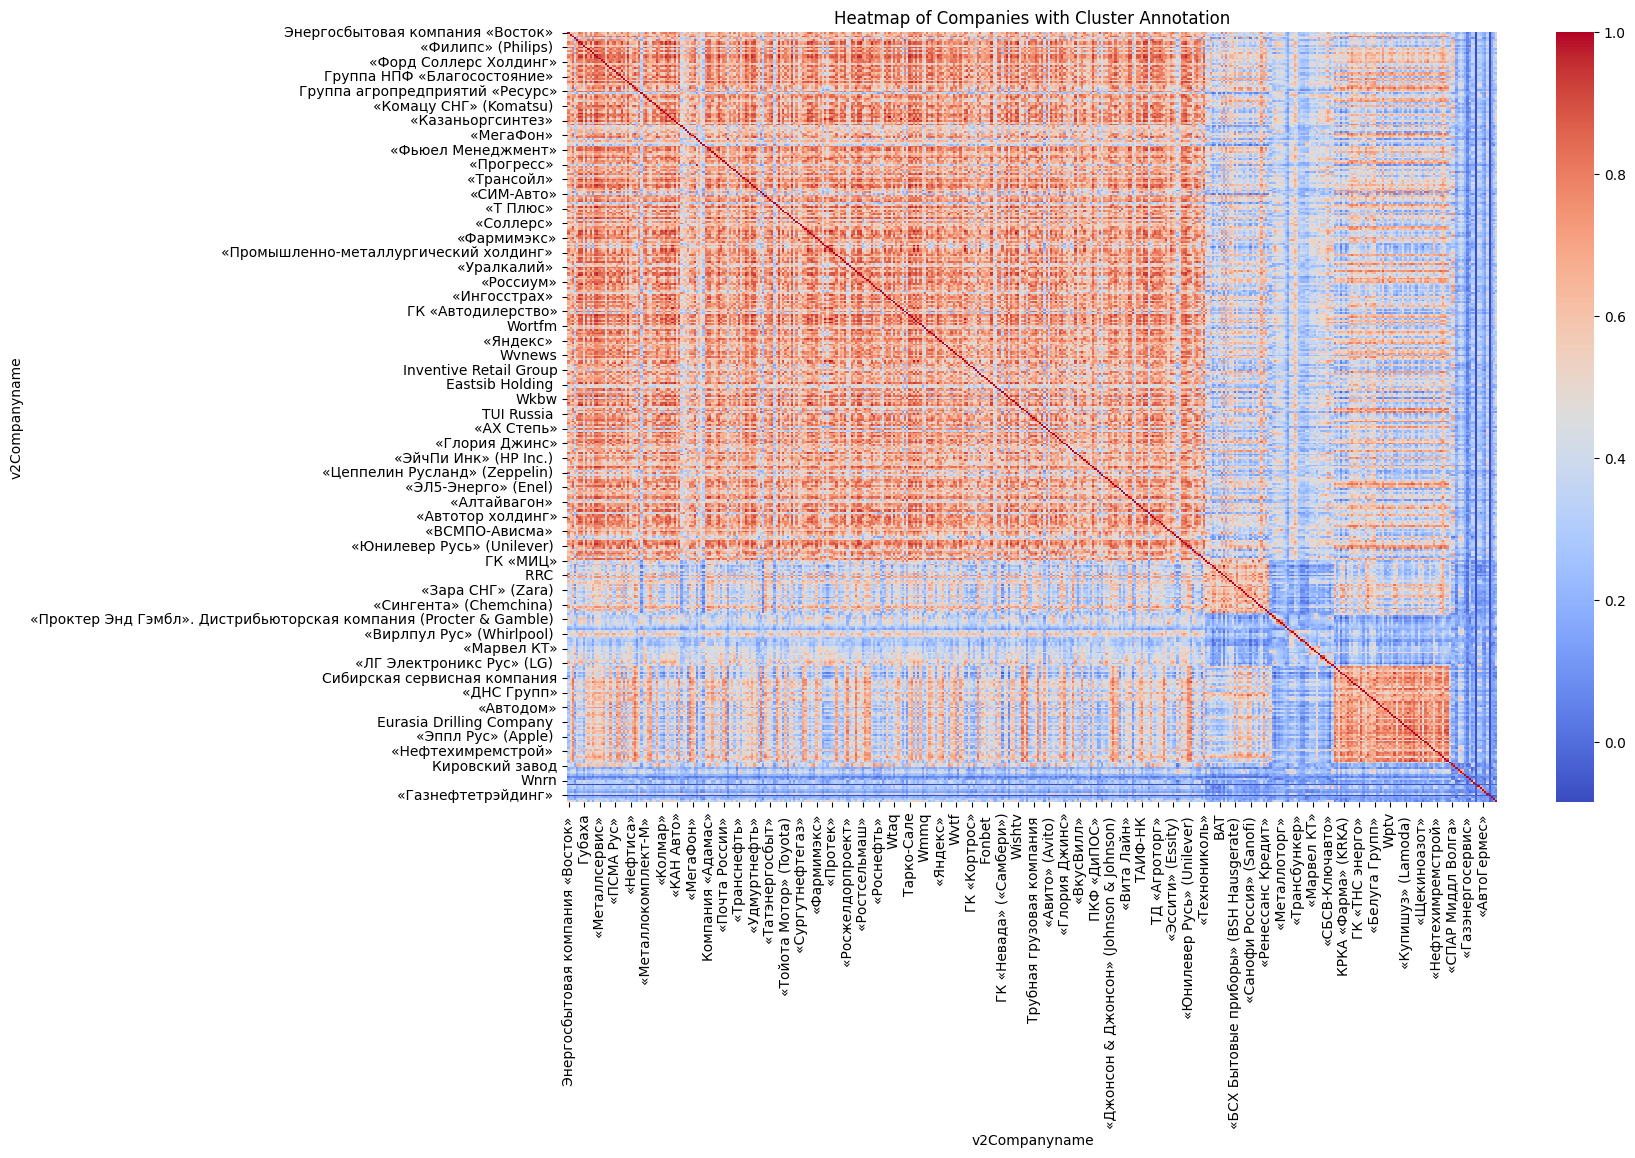

In [128]:
df_clustered = spearman_corr.copy()
df_clustered['Cluster'] = clusters

df_clustered_sorted = df_clustered.sort_values('Cluster')
sorted_labels = df_clustered_sorted.index

plt.figure(figsize=(15, 10))
sns.heatmap(df_clustered_sorted.drop('Cluster', axis=1).loc[sorted_labels, sorted_labels],
            cmap='coolwarm', annot=False)
plt.title('Heatmap of Companies with Cluster Annotation')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



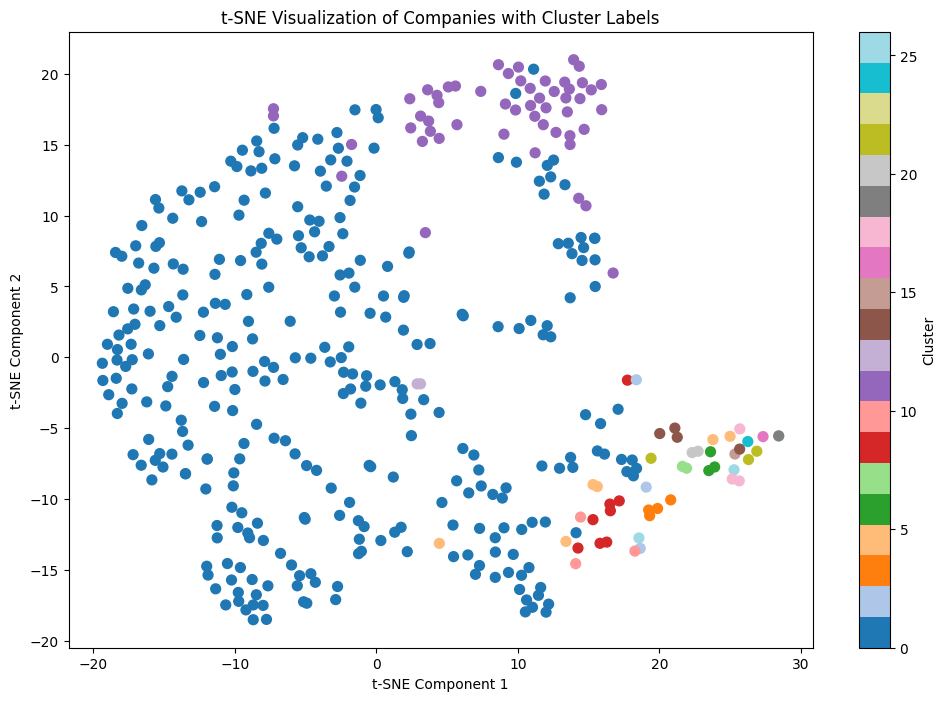

In [129]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(spearman_corr)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='tab20', s=50)
plt.title('t-SNE Visualization of Companies with Cluster Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



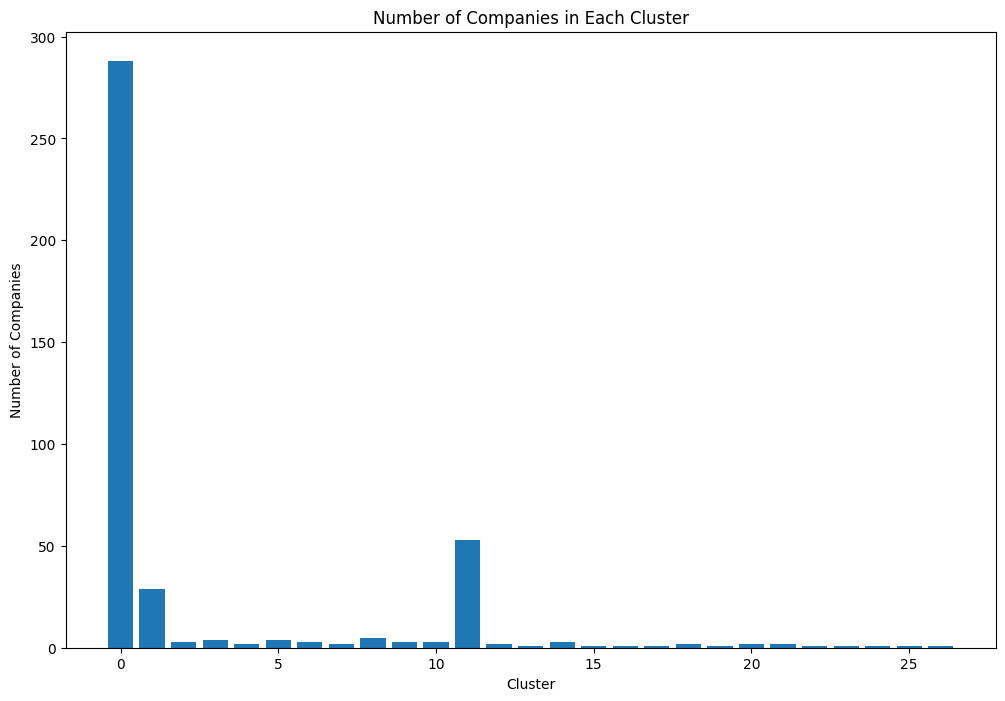

In [134]:
unique, counts = np.unique(clusters, return_counts=True)
plt.figure(figsize=(12, 8))
plt.bar(unique, counts)
plt.title('Number of Companies in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Companies')
plt.show()